In [1]:
library(feather)
library(scran)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tap

In [2]:
#read in cells exp post qc and annoations
qc_cells_path = '../data/processed/qc_nuclei.feather'
qc_annot_path =  '../data/processed/qc_nuclei_annotation.csv'
qc_cells = read_feather(qc_cells_path)
qc_annot = read.csv(qc_annot_path)

In [3]:
#create a SingleCell experiment object
sce_qc = SingleCellExperiment(list(counts=t(as.matrix(qc_cells))))


In [4]:
#compute size factors using the method from https://doi.org/10.1186/s13059-016-0947-7
sce_qc = computeSumFactors(sce_qc, clusters=qc_annot$precluster)


In [5]:
#normalize via sum factors
sce_qc = normalize(sce_qc)


In [6]:
#add size factors to annoation for later analysis
qc_annot["size_factor"] = sizeFactors(sce_qc)


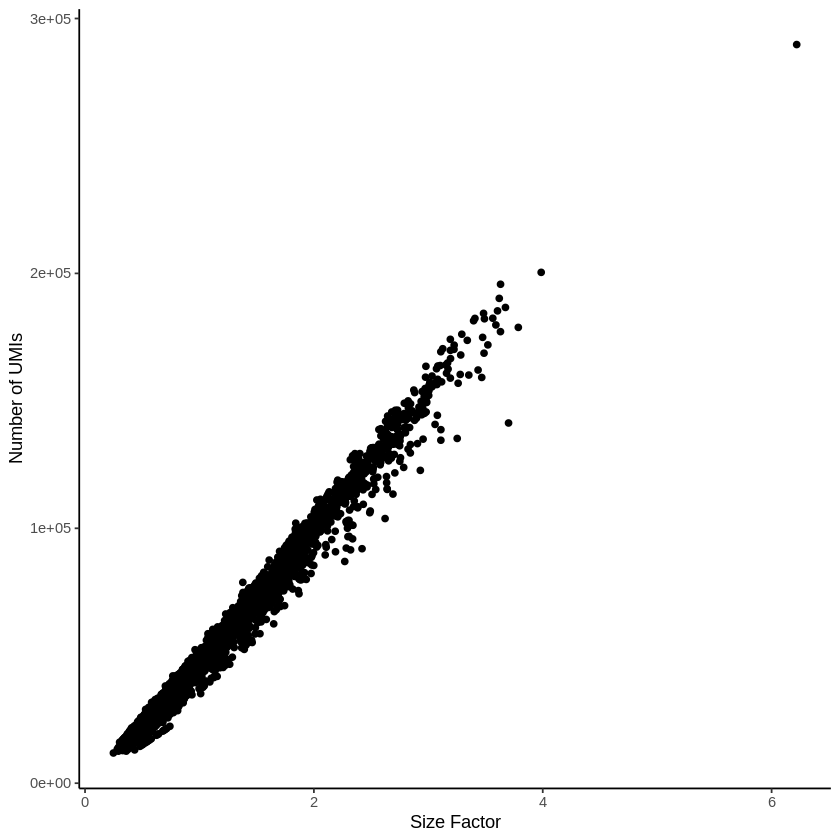

In [7]:
library(ggplot2)
#plot(as.vector(qc_annot["size_factor"]), as.vector(qc_annot["nUMIs"]), xlab="Size Factor", ylab="Number of UMIs")
ggplot(qc_annot,aes(x=size_factor,y=nUMIs))+geom_point()+xlab("Size Factor")+ylab("Number of UMIs")+theme_classic()

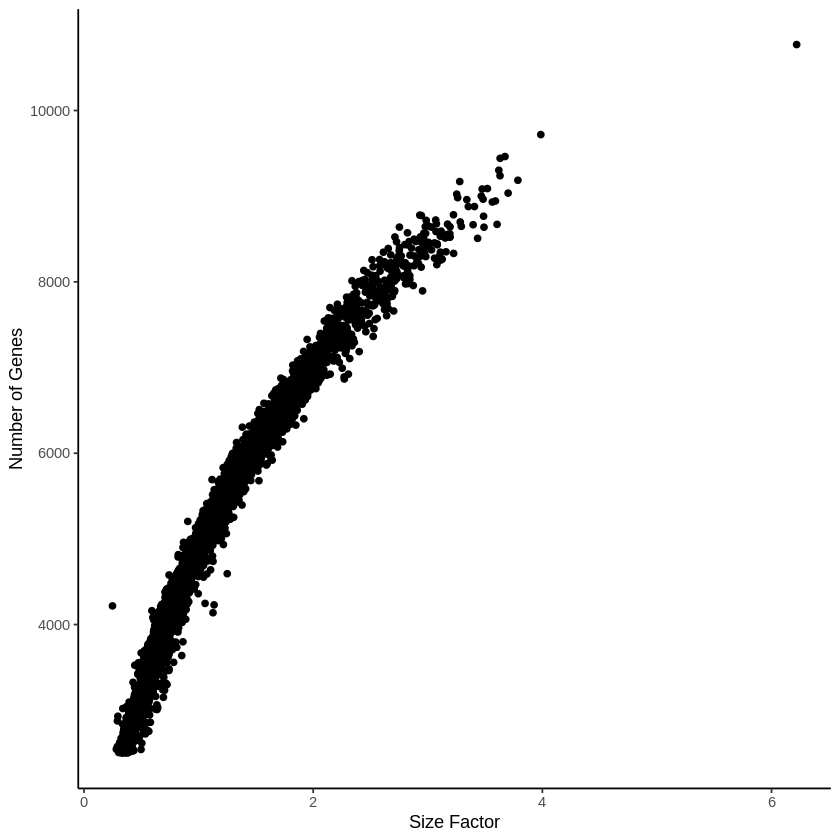

In [8]:
ggplot(qc_annot,aes(x=size_factor,y=nGenes))+geom_point()+xlab("Size Factor")+ylab("Number of Genes")+theme_classic()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



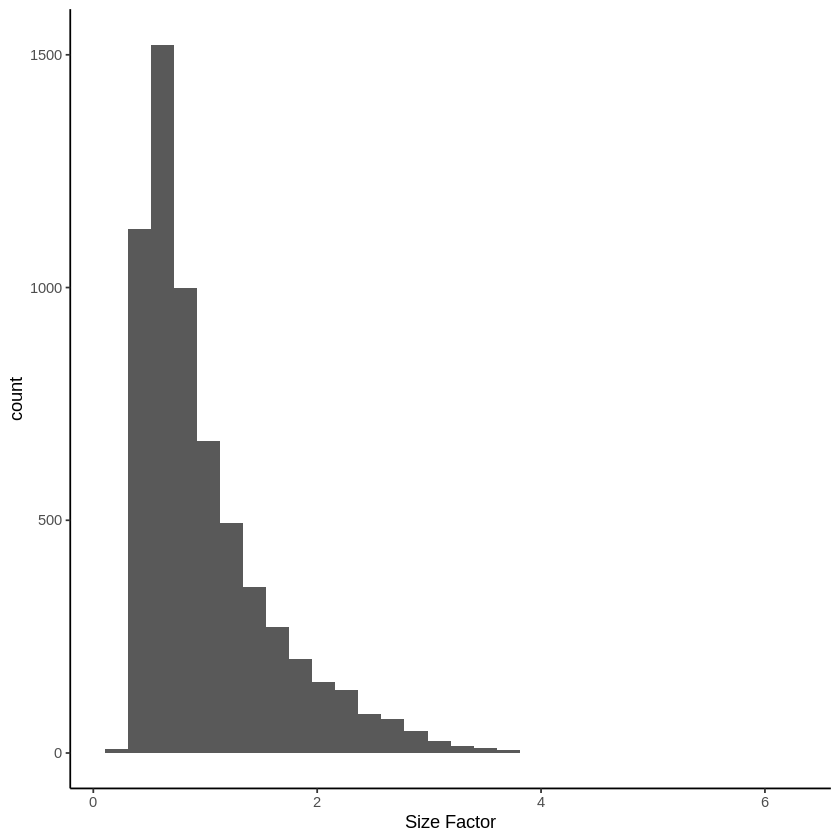

In [9]:
ggplot(qc_annot,aes(x=size_factor))+geom_histogram()+xlab("Size Factor")+theme_classic()


In [10]:
#write normalized counts to file
normalized_logcounts = as.matrix(sce_qc@assays[[2]])
normalized_df = as.data.frame(t(normalized_logcounts))
colnames(normalized_df)= colnames(qc_cells)
norm_cells_path = '../data/processed/norm_qc_nuclei.feather'
write_feather(normalized_df,norm_cells_path)



In [11]:
#write update annoation to file
annot_path = '../data/processed/norm_qc_nuclei_annotation.csv'
write.csv(qc_annot,annot_path)